In [1]:
%matplotlib widget
import sympy as sp
import numpy as np
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D
# import ipyvolume as ipv
import ipywidgets as ipw
sp.init_printing()

## Tangential direction

In [49]:
sigma_t_n1 = sp.symbols('\sigma_{\mathrm{T}_{n+1}}')
sigma_t_n1_trial = sp.symbols('\overline{\sigma}_{\mathrm{T}_{n+1}}')
omega_t_n1 = sp.symbols('\omega_{\mathrm{T}_{n+1}}')
epsilon_p_t_n1 = sp.symbols('\epsilon^p_{\mathrm{T}_{n+1}}')
epsilon_p_t_n = sp.symbols('\epsilon^p_{\mathrm{T}_{n}}')
epsilon_t_n1 = sp.symbols('\epsilon_{\mathrm{T}_{n+1}}')
epsilon_t_n = sp.symbols('\epsilon_{\mathrm{T}_{n}}')
E_t = sp.symbols('E_{\mathrm{T}}')
gamma = sp.symbols('\gamma')
alpha_n = sp.symbols('alpha_n')
K = sp.symbols('K')
p = sp.symbols('p')
z_n = sp.symbols('z_n')

In [50]:
omega_t_n = sp.symbols('\omega_{\mathrm{T}_{n}}')
delta_lambda = sp.symbols('\Delta\lambda')
c = sp.symbols('c')
sigma_bar = sp.symbols('\overline{\sigma_{\mathrm{T}}}')
sigma_n_n = sp.symbols('\sigma_{\mathrm{N}_{n}}')
Y_t_n1 = sp.symbols('Y_{\mathrm{T}_{n+1}}')
S = sp.symbols('S')
m = sp.symbols('m')
r = sp.symbols('r')

In [60]:
sigma_t_n1_trial_ = E_t * (epsilon_t_n1 - epsilon_p_t_n)
sigma_t_n1_trial_

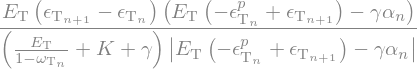

In [61]:
# delta_lambda_ = (abs(E_t * (epsilon_t_n1 - epsilon_p_t_n) - gamma * alpha_n ) - K * z_n - sigma_bar + m * sigma_n_n ) / \
# (E_t / (1 - omega_t_n) + gamma + K)
# delta_lambda_ 

delta_lambda_ = (E_t * (epsilon_t_n1 - epsilon_t_n) * (sigma_t_n1_trial_ - gamma * alpha_n)/abs(sigma_t_n1_trial_ - gamma * alpha_n)) / \
(E_t / (1 - omega_t_n) + gamma + K)
# delta_lambda_ = sp.simplify(delta_lambda_)
delta_lambda_ 

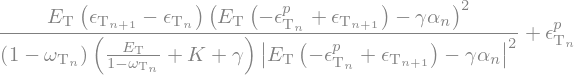

In [62]:
epsilon_p_t_n1_ = epsilon_p_t_n + (delta_lambda_ / (1 - omega_t_n)) * (sigma_t_n1_trial_ - gamma * alpha_n)/abs(sigma_t_n1_trial_ - gamma * alpha_n)
# epsilon_p_t_n1_ = sp.simplify(epsilon_p_t_n1_)
epsilon_p_t_n1_

In [63]:
Y_t_n1_ = sp.Rational(1,2) * E_t * (epsilon_t_n1 - epsilon_p_t_n)**2
# sp.simplify(Y_t_n1_)

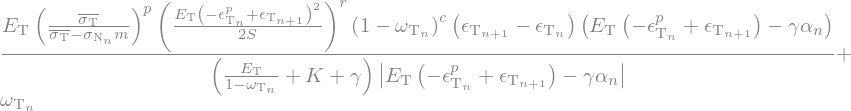

In [64]:
omega_t_n1_ = omega_t_n + delta_lambda_ * (1 - omega_t_n) ** c * (sigma_bar/(sigma_bar - m*sigma_n_n))**p * (Y_t_n1_/S)**r
omega_t_n1_

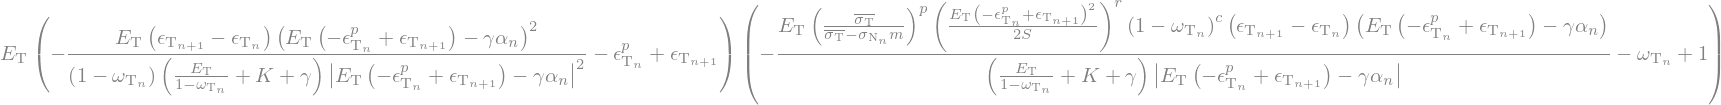

In [65]:
sigma_t_n1_ = (1 - omega_t_n1_) * E_t * (epsilon_t_n1 - epsilon_p_t_n1_)
sigma_t_n1_

In [66]:
c_T = sigma_t_n1_.diff(epsilon_t_n1)

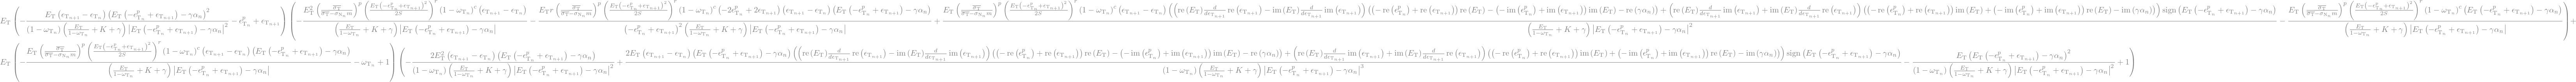

In [67]:
c_T

\displaystyle E_{\mathrm{T}} \left(- \frac{E_{\mathrm{T}} \left(\epsilon_{\mathrm{T}_{n+1}} - \epsilon_{\mathrm{T}_{n}}\right) \left(E_{\mathrm{T}} \left(- \epsilon^p_{\mathrm{T}_{n}} + \epsilon_{\mathrm{T}_{n+1}}\right) - \gamma \alpha_{n}\right)^{2}}{\left(1 - \omega_{\mathrm{T}_{n}}\right) \left(\frac{E_{\mathrm{T}}}{1 - \omega_{\mathrm{T}_{n}}} + K + \gamma\right) \left|{E_{\mathrm{T}} \left(- \epsilon^p_{\mathrm{T}_{n}} + \epsilon_{\mathrm{T}_{n+1}}\right) - \gamma \alpha_{n}}\right|^{2}} - \epsilon^p_{\mathrm{T}_{n}} + \epsilon_{\mathrm{T}_{n+1}}\right) \left(- \frac{E_{\mathrm{T}}^{2} \left(\frac{\overline{\sigma_{\mathrm{T}}}}{\overline{\sigma_{\mathrm{T}}} - \sigma_{\mathrm{N}_{n}} m}\right)^{p} \left(\frac{E_{\mathrm{T}} \left(- \epsilon^p_{\mathrm{T}_{n}} + \epsilon_{\mathrm{T}_{n+1}}\right)^{2}}{2 S}\right)^{r} \left(1 - \omega_{\mathrm{T}_{n}}\right)^{c} \left(\epsilon_{\mathrm{T}_{n+1}} - \epsilon_{\mathrm{T}_{n}}\right)}{\left(\frac{E_{\mathrm{T}}}{1 - \omega_{\mathrm{T}_{n}}} + K + \gamma\right) \left|{E_{\mathrm{T}} \left(- \epsilon^p_{\mathrm{T}_{n}} + \epsilon_{\mathrm{T}_{n+1}}\right) - \gamma \alpha_{n}}\right|} - \frac{E_{\mathrm{T}} r \left(\frac{\overline{\sigma_{\mathrm{T}}}}{\overline{\sigma_{\mathrm{T}}} - \sigma_{\mathrm{N}_{n}} m}\right)^{p} \left(\frac{E_{\mathrm{T}} \left(- \epsilon^p_{\mathrm{T}_{n}} + \epsilon_{\mathrm{T}_{n+1}}\right)^{2}}{2 S}\right)^{r} \left(1 - \omega_{\mathrm{T}_{n}}\right)^{c} \left(- 2 \epsilon^p_{\mathrm{T}_{n}} + 2 \epsilon_{\mathrm{T}_{n+1}}\right) \left(\epsilon_{\mathrm{T}_{n+1}} - \epsilon_{\mathrm{T}_{n}}\right) \left(E_{\mathrm{T}} \left(- \epsilon^p_{\mathrm{T}_{n}} + \epsilon_{\mathrm{T}_{n+1}}\right) - \gamma \alpha_{n}\right)}{\left(- \epsilon^p_{\mathrm{T}_{n}} + \epsilon_{\mathrm{T}_{n+1}}\right)^{2} \left(\frac{E_{\mathrm{T}}}{1 - \omega_{\mathrm{T}_{n}}} + K + \gamma\right) \left|{E_{\mathrm{T}} \left(- \epsilon^p_{\mathrm{T}_{n}} + \epsilon_{\mathrm{T}_{n+1}}\right) - \gamma \alpha_{n}}\right|} + \frac{E_{\mathrm{T}} \left(\frac{\overline{\sigma_{\mathrm{T}}}}{\overline{\sigma_{\mathrm{T}}} - \sigma_{\mathrm{N}_{n}} m}\right)^{p} \left(\frac{E_{\mathrm{T}} \left(- \epsilon^p_{\mathrm{T}_{n}} + \epsilon_{\mathrm{T}_{n+1}}\right)^{2}}{2 S}\right)^{r} \left(1 - \omega_{\mathrm{T}_{n}}\right)^{c} \left(\epsilon_{\mathrm{T}_{n+1}} - \epsilon_{\mathrm{T}_{n}}\right) \left(\left(\operatorname{re}{\left(E_{\mathrm{T}}\right)} \frac{d}{d \epsilon_{\mathrm{T}_{n+1}}} \operatorname{re}{\left(\epsilon_{\mathrm{T}_{n+1}}\right)} - \operatorname{im}{\left(E_{\mathrm{T}}\right)} \frac{d}{d \epsilon_{\mathrm{T}_{n+1}}} \operatorname{im}{\left(\epsilon_{\mathrm{T}_{n+1}}\right)}\right) \left(\left(- \operatorname{re}{\left(\epsilon^p_{\mathrm{T}_{n}}\right)} + \operatorname{re}{\left(\epsilon_{\mathrm{T}_{n+1}}\right)}\right) \operatorname{re}{\left(E_{\mathrm{T}}\right)} - \left(- \operatorname{im}{\left(\epsilon^p_{\mathrm{T}_{n}}\right)} + \operatorname{im}{\left(\epsilon_{\mathrm{T}_{n+1}}\right)}\right) \operatorname{im}{\left(E_{\mathrm{T}}\right)} - \operatorname{re}{\left(\gamma \alpha_{n}\right)}\right) + \left(\operatorname{re}{\left(E_{\mathrm{T}}\right)} \frac{d}{d \epsilon_{\mathrm{T}_{n+1}}} \operatorname{im}{\left(\epsilon_{\mathrm{T}_{n+1}}\right)} + \operatorname{im}{\left(E_{\mathrm{T}}\right)} \frac{d}{d \epsilon_{\mathrm{T}_{n+1}}} \operatorname{re}{\left(\epsilon_{\mathrm{T}_{n+1}}\right)}\right) \left(\left(- \operatorname{re}{\left(\epsilon^p_{\mathrm{T}_{n}}\right)} + \operatorname{re}{\left(\epsilon_{\mathrm{T}_{n+1}}\right)}\right) \operatorname{im}{\left(E_{\mathrm{T}}\right)} + \left(- \operatorname{im}{\left(\epsilon^p_{\mathrm{T}_{n}}\right)} + \operatorname{im}{\left(\epsilon_{\mathrm{T}_{n+1}}\right)}\right) \operatorname{re}{\left(E_{\mathrm{T}}\right)} - \operatorname{im}{\left(\gamma \alpha_{n}\right)}\right)\right) \operatorname{sign}{\left(E_{\mathrm{T}} \left(- \epsilon^p_{\mathrm{T}_{n}} + \epsilon_{\mathrm{T}_{n+1}}\right) - \gamma \alpha_{n} \right)}}{\left(\frac{E_{\mathrm{T}}}{1 - \omega_{\mathrm{T}_{n}}} + K + \gamma\right) \left|{E_{\mathrm{T}} \left(- \epsilon^p_{\mathrm{T}_{n}} + \epsilon_{\mathrm{T}_{n+1}}\right) - \gamma \alpha_{n}}\right|^{2}} - \frac{E_{\mathrm{T}} \left(\frac{\overline{\sigma_{\mathrm{T}}}}{\overline{\sigma_{\mathrm{T}}} - \sigma_{\mathrm{N}_{n}} m}\right)^{p} \left(\frac{E_{\mathrm{T}} \left(- \epsilon^p_{\mathrm{T}_{n}} + \epsilon_{\mathrm{T}_{n+1}}\right)^{2}}{2 S}\right)^{r} \left(1 - \omega_{\mathrm{T}_{n}}\right)^{c} \left(E_{\mathrm{T}} \left(- \epsilon^p_{\mathrm{T}_{n}} + \epsilon_{\mathrm{T}_{n+1}}\right) - \gamma \alpha_{n}\right)}{\left(\frac{E_{\mathrm{T}}}{1 - \omega_{\mathrm{T}_{n}}} + K + \gamma\right) \left|{E_{\mathrm{T}} \left(- \epsilon^p_{\mathrm{T}_{n}} + \epsilon_{\mathrm{T}_{n+1}}\right) - \gamma \alpha_{n}}\right|}\right) + E_{\mathrm{T}} \left(- \frac{E_{\mathrm{T}} \left(\frac{\overline{\sigma_{\mathrm{T}}}}{\overline{\sigma_{\mathrm{T}}} - \sigma_{\mathrm{N}_{n}} m}\right)^{p} \left(\frac{E_{\mathrm{T}} \left(- \epsilon^p_{\mathrm{T}_{n}} + \epsilon_{\mathrm{T}_{n+1}}\right)^{2}}{2 S}\right)^{r} \left(1 - \omega_{\mathrm{T}_{n}}\right)^{c} \left(\epsilon_{\mathrm{T}_{n+1}} - \epsilon_{\mathrm{T}_{n}}\right) \left(E_{\mathrm{T}} \left(- \epsilon^p_{\mathrm{T}_{n}} + \epsilon_{\mathrm{T}_{n+1}}\right) - \gamma \alpha_{n}\right)}{\left(\frac{E_{\mathrm{T}}}{1 - \omega_{\mathrm{T}_{n}}} + K + \gamma\right) \left|{E_{\mathrm{T}} \left(- \epsilon^p_{\mathrm{T}_{n}} + \epsilon_{\mathrm{T}_{n+1}}\right) - \gamma \alpha_{n}}\right|} - \omega_{\mathrm{T}_{n}} + 1\right) \left(- \frac{2 E_{\mathrm{T}}^{2} \left(\epsilon_{\mathrm{T}_{n+1}} - \epsilon_{\mathrm{T}_{n}}\right) \left(E_{\mathrm{T}} \left(- \epsilon^p_{\mathrm{T}_{n}} + \epsilon_{\mathrm{T}_{n+1}}\right) - \gamma \alpha_{n}\right)}{\left(1 - \omega_{\mathrm{T}_{n}}\right) \left(\frac{E_{\mathrm{T}}}{1 - \omega_{\mathrm{T}_{n}}} + K + \gamma\right) \left|{E_{\mathrm{T}} \left(- \epsilon^p_{\mathrm{T}_{n}} + \epsilon_{\mathrm{T}_{n+1}}\right) - \gamma \alpha_{n}}\right|^{2}} + \frac{2 E_{\mathrm{T}} \left(\epsilon_{\mathrm{T}_{n+1}} - \epsilon_{\mathrm{T}_{n}}\right) \left(E_{\mathrm{T}} \left(- \epsilon^p_{\mathrm{T}_{n}} + \epsilon_{\mathrm{T}_{n+1}}\right) - \gamma \alpha_{n}\right) \left(\left(\operatorname{re}{\left(E_{\mathrm{T}}\right)} \frac{d}{d \epsilon_{\mathrm{T}_{n+1}}} \operatorname{re}{\left(\epsilon_{\mathrm{T}_{n+1}}\right)} - \operatorname{im}{\left(E_{\mathrm{T}}\right)} \frac{d}{d \epsilon_{\mathrm{T}_{n+1}}} \operatorname{im}{\left(\epsilon_{\mathrm{T}_{n+1}}\right)}\right) \left(\left(- \operatorname{re}{\left(\epsilon^p_{\mathrm{T}_{n}}\right)} + \operatorname{re}{\left(\epsilon_{\mathrm{T}_{n+1}}\right)}\right) \operatorname{re}{\left(E_{\mathrm{T}}\right)} - \left(- \operatorname{im}{\left(\epsilon^p_{\mathrm{T}_{n}}\right)} + \operatorname{im}{\left(\epsilon_{\mathrm{T}_{n+1}}\right)}\right) \operatorname{im}{\left(E_{\mathrm{T}}\right)} - \operatorname{re}{\left(\gamma \alpha_{n}\right)}\right) + \left(\operatorname{re}{\left(E_{\mathrm{T}}\right)} \frac{d}{d \epsilon_{\mathrm{T}_{n+1}}} \operatorname{im}{\left(\epsilon_{\mathrm{T}_{n+1}}\right)} + \operatorname{im}{\left(E_{\mathrm{T}}\right)} \frac{d}{d \epsilon_{\mathrm{T}_{n+1}}} \operatorname{re}{\left(\epsilon_{\mathrm{T}_{n+1}}\right)}\right) \left(\left(- \operatorname{re}{\left(\epsilon^p_{\mathrm{T}_{n}}\right)} + \operatorname{re}{\left(\epsilon_{\mathrm{T}_{n+1}}\right)}\right) \operatorname{im}{\left(E_{\mathrm{T}}\right)} + \left(- \operatorname{im}{\left(\epsilon^p_{\mathrm{T}_{n}}\right)} + \operatorname{im}{\left(\epsilon_{\mathrm{T}_{n+1}}\right)}\right) \operatorname{re}{\left(E_{\mathrm{T}}\right)} - \operatorname{im}{\left(\gamma \alpha_{n}\right)}\right)\right) \operatorname{sign}{\left(E_{\mathrm{T}} \left(- \epsilon^p_{\mathrm{T}_{n}} + \epsilon_{\mathrm{T}_{n+1}}\right) - \gamma \alpha_{n} \right)}}{\left(1 - \omega_{\mathrm{T}_{n}}\right) \left(\frac{E_{\mathrm{T}}}{1 - \omega_{\mathrm{T}_{n}}} + K + \gamma\right) \left|{E_{\mathrm{T}} \left(- \epsilon^p_{\mathrm{T}_{n}} + \epsilon_{\mathrm{T}_{n+1}}\right) - \gamma \alpha_{n}}\right|^{3}} - \frac{E_{\mathrm{T}} \left(E_{\mathrm{T}} \left(- \epsilon^p_{\mathrm{T}_{n}} + \epsilon_{\mathrm{T}_{n+1}}\right) - \gamma \alpha_{n}\right)^{2}}{\left(1 - \omega_{\mathrm{T}_{n}}\right) \left(\frac{E_{\mathrm{T}}}{1 - \omega_{\mathrm{T}_{n}}} + K + \gamma\right) \left|{E_{\mathrm{T}} \left(- \epsilon^p_{\mathrm{T}_{n}} + \epsilon_{\mathrm{T}_{n+1}}\right) - \gamma \alpha_{n}}\right|^{2}} + 1\right) 


## Normal direction

In [12]:
sigma_n_n1 = sp.symbols('\sigma_{\mathrm{N}_{n+1}}')
sigma_n_n1_trial = sp.symbols('\overline{\sigma}_{\mathrm{N}_{n+1}}')
omega_n_n1 = sp.symbols('\omega_{\mathrm{N}_{n+1}}')
omega_n_n = sp.symbols('\omega_{\mathrm{N}_{n}}')
epsilon_p_n_n1 = sp.symbols('\epsilon^p_{\mathrm{N}_{n+1}}')
epsilon_p_n_n = sp.symbols('\epsilon^p_{\mathrm{N}_{n}}')
epsilon_n_n1 = sp.symbols('\epsilon_{\mathrm{N}_{n+1}}')
epsilon_n_n = sp.symbols('\epsilon_{\mathrm{N}_{n}}')
E_n = sp.symbols('E_{\mathrm{N}}')
gamma_n = sp.symbols('\gamma_{\mathrm{N}}')
alpha_n_n = sp.symbols('alpha_{\mathrm{N}_{n}}')
r_n_n = sp.symbols('r_{\mathrm{N}_{n}}')
K_N = sp.symbols('K_{\mathrm{N}}')
A_d = sp.symbols('A_{\mathrm{d}}')

In [13]:
sigma_trial_ = E_n * (epsilon_n_n1 - epsilon_p_n_n)

## Tension

In [14]:
delta_lambda_omena_n_ = E_n * (epsilon_n_n1 - epsilon_n_n) * epsilon_n_n * A_d * (1 + r_n_n)**2
delta_lambda_omena_n_

In [15]:
omega_n_n1_ = omega_n_n + delta_lambda_omena_n_
omega_n_n1_

In [16]:
sigma_tension_n = (1 - omega_n_n1_) * E_n * (epsilon_n_n1 - epsilon_p_n_n)

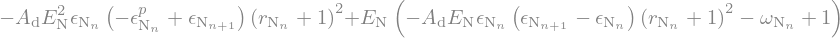

In [18]:
C_tension = sigma_tension_n.diff(epsilon_n_n1)
C_tension